<a href="https://colab.research.google.com/github/AnoopKunju/RatingPredictor/blob/main/Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
### Anoop Kunjumon Scariah
### Video demo [click here](https://youtu.be/yQJyGSp7OLc)
### Hosted Application [click here](https://ratingprediction-ml-nlp.herokuapp.com/)
### Github [click here](https://github.com/AnoopKunju/RatingPredictor)
### Blog Post (Report) [click here](http://www.anoopscariah.me/dm-final-project/)


In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Review DM/bgg-15m-reviews.csv')

# Dataset

In [ ]:
df.head(10)

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
5,5,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic
6,6,katrinacarenne,10.0,NaN,30549,Pandemic
7,7,DSpangler,10.0,NaN,30549,Pandemic
8,8,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic
9,9,calbearfan,10.0,"Fun, fun game. Strategy is required, but defin...",30549,Pandemic


*The dataset consist of 6 columns the columns ID, name and user is not taken into consideration for this projects as we are preparing a model which can predict rating using NLP*

In [ ]:
df.shape

(15823269, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15823269 entries, 0 to 15823268
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   user        object 
 2   rating      float64
 3   comment     object 
 4   ID          int64  
 5   name        object 
dtypes: float64(1), int64(2), object(3)
memory usage: 724.3+ MB


In [ ]:
df.drop(['Unnamed: 0', 'user','ID','name'], axis=1, inplace= True) #dropping columns which is not fruitful for this project
df.head()

,rating,comment
0,10.0,NaN
1,10.0,Hands down my favorite new game of BGG CON 200...
2,10.0,I tend to either love or easily tire of co-op ...
3,10.0,NaN
4,10.0,This is an amazing co-op game. I play mostly ...


As we can see in the comment column it consist of Null data which doesnot make any contribution to our prediction so we will first clean the data

In [ ]:
df.dropna(inplace= True)
df.head(10)

,rating,comment
1,10.0,Hands down my favorite new game of BGG CON 200...
2,10.0,I tend to either love or easily tire of co-op ...
4,10.0,This is an amazing co-op game. I play mostly ...
5,10.0,Hey! I can finally rate this game I've been pl...
8,10.0,Love it- great fun with my son. 2 plays so far...
9,10.0,"Fun, fun game. Strategy is required, but defin..."
11,10.0,I don't know how they balanced this thing. Ab...
12,10.0,Best collaborative multi-player game out there...
13,10.0,(25+ plays) Who can play? Family game for ...
16,10.0,"A thematic, brisk game that is well balanced a..."


In [ ]:
df.shape

(2995023, 2)

*We can see that after doing the cleaning for NULL value we have found that the data size srink from 15 million to almost 3 million*

### Undersatnding Data  

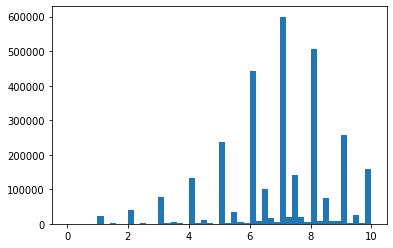

In [ ]:
plt.hist(df['rating'], bins = 50)
plt.show()

*From the above plot we can see that the ratings are not just integer value they in float too so we the model genration purpose we need to round the rating to nearest integer*

In [ ]:
df.rating = df['rating'].round()

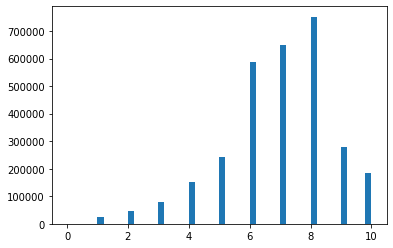

In [ ]:
plt.hist(df['rating'], bins = 50)
plt.show()

*From the above plot we can understand that the dataset consist of comments which are rated 6 to 8 are more in number* 

### Data Reduciton 
*As the data consist of almost 3 million data and requires a huge amount of computation power therefore for carrying out preprocessing and model generation im using 10% of the data create the model and carry out testing on it.*

In [ ]:
df_final = df.sample(frac=0.1, replace=False, random_state=1)
df_final.head()

,rating,comment
15632034,8.0,FUN: rally fast abstract with a nice theme and...
5753885,8.0,Really like both this and Wallenstein. It's a...
8358861,7.0,I thought this was fun. It's random and luck b...
6177686,7.0,"This is a fun, light game that combines yahtze..."
11402598,5.0,Social deduction game. Reminded me of spyfall ...


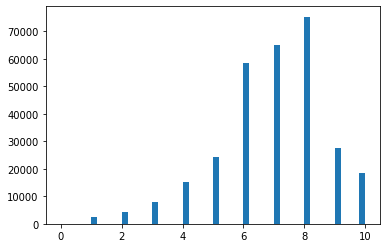

In [ ]:
plt.hist(df_final['rating'], bins = 50)
plt.show()

*From the above graph we can see that the data is split in the same fashion as the orginal data of 3 million , therefore we can be sure there is no loss of information*

In [ ]:
X = df_final['comment'].values
Y = df_final['rating'].values

# Removing StopWords, Punctuatio and Integers from Comment

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
print(np.where(Y_train == 3))

(array([    50,     64,     92, ..., 209592, 209596, 209602]),)


In [ ]:
exclude_list = string.digits + string.punctuation #removing the punctuation & digits
stopwords = nltk.corpus.stopwords.words("english")

def cleaning(text):
  nlp.max_length = len(text)
  raw_text = text.lower() #coverting to lower case
  # Lemmatization
  table = str.maketrans(exclude_list,len(exclude_list)*" ")
  raw_text = raw_text.translate(table)
  doc = nlp(raw_text, disable = ['ner', 'parser']) #Loading into the 'en model' Lemmatization
  lemmatized_output = " ".join([token.lemma_ for token in doc]) #Lemmatize list of words and join
  # Removing Stopwords
  words = lemmatized_output.split()
  clean_text = " ".join([w for w in words if w not in stopwords])
  return clean_text

In [ ]:
Xtrain_clean = list()
for text in X_train:
  Xtrain_clean.append(cleaning(text))

In [ ]:
Xtrain_clean = list(map(lambda st: str.replace(st,'-PRON-',''), Xtrain_clean)) #removing string -PRON-

*The above clean text is output of the process which consist of steps like coversting to lower case, removing punctuation & digits. The text is then Lemmatized. Lemmatization  is a process of Text normalization technique used in NLP which helps in preparing text for next step of model creation.*

# Model Creation and Evaluation

In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.5 , max_features= 15000)
dtm = vectorizer.fit_transform(Xtrain_clean)
dtm_test = vectorizer.transform(X_test)

### MultiNomial Naive Bayes

In [ ]:
NaiveBayes = MultinomialNB()
NaiveBayes.fit(dtm, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Y_pred = NaiveBayes.predict(dtm_test)

In [ ]:
print("MUltinomial Naive Bayes Test Accuracy is {} %".format(accuracy_score(Y_test, Y_pred)*100))

MUltinomial Naive Bayes Test Accuracy is 28.525002504145753 %


### Linear SVC

In [ ]:
SVC = LinearSVC()
SVC.fit(dtm,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
Y_pred_svm = SVC.predict(dtm_test)

In [ ]:
print("Linear SVC Test Accuracy is {} %".format(accuracy_score(Y_test, Y_pred_svm)*100))

Linear SVC Test Accuracy is 27.649107967635306 %


# Hyperparameter tunning 

Hypeparameter for Multinomial Naive Bayes

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
alpha = list(range(1, 11, 1))
accuracy = dict()
for x in alpha:
  MNBC  = MultinomialNB(alpha= x)
  scores = cross_val_score(MNBC, dtm, Y_train, cv=3, scoring='accuracy')
  accuracy[x] = scores.mean()
print(accuracy)

{1: 0.294055355290921, 2: 0.2934305101732056, 3: 0.29114576516998586, 4: 0.2885748239130295, 5: 0.2860325049228848, 6: 0.2835474229584001, 7: 0.28145346765394, 8: 0.2793070426756851, 9: 0.27752789715523435, 10: 0.2760444784969981}


In [ ]:
naiveDF = pd.DataFrame.from_dict(accuracy,orient='index')
naiveDF.sort_values(0,ascending= False)

,0
1,0.294055
2,0.293431
3,0.291146
4,0.288575
5,0.286033
6,0.283547
7,0.281453
8,0.279307
9,0.277528
10,0.276044


*from above we can see that the alpha was 1 outperform others in the case of Multinomial Naive Bayes therefore keeping alpha 1 as the hyperparameter for the Naive Bayes model*

Hypeparameter for Linear SVC

In [ ]:
SVC_acc = dict()
SVC_10 = LinearSVC(C= 10)
scores = cross_val_score(SVC, dtm, Y_train, cv=3, scoring='accuracy')

In [ ]:
SVC_100 = LinearSVC(C= 100)
scores = cross_val_score(SVC, dtm, Y_train, cv=3, scoring='accuracy')

In [ ]:
SVC_1 = LinearSVC()
scores = cross_val_score(SVC, dtm, Y_train, cv=3, scoring='accuracy')

In [ ]:
SVCDF = pd.DataFrame.from_dict(SVC_acc,orient='index')
SVCDF.sort_values(0,ascending= False)

,0
100,0.287010
10,0.287006
1,0.287006


*from the above comparison we can see that the hyperparameter C= 100 performs better for Linear SVC model*

# Conclusion

In [ ]:
review = list()
comment = "I hate the game"
review.append(comment)
dtm_rev = vectorizer.transform(review)
pred_naive = NaiveBayes.predict(dtm_rev)
pred_SVC = SVC.predict(dtm_rev)
print("prediction for NAIVE Bayes:",pred_naive)
print("prediction for SVC:",pred_SVC)

prediction for NAIVE Bayes: [8.]
prediction for SVC: [1.]


*As the model is been trained on partial amount of data due to computation limitation and as we can see that the data is not balance in the case of rating which we can understand by seeing the visulization of rating that the amount of comments with rating 8 is more in the dataset as compared to others, therefore which has lead to  error of overfitting the model for the class 8 rating data in Navie Bayes model where as SVC has performed in a proper fashion. In theroy and statics wise the Naive Bayes does perform good on the data but after observation we can understand that Naive Bayes model is Overfitted*

*Therefore for the application development I'm using Linear SVC model for prediction*

# Saving the model

In [ ]:
import pickle

In [ ]:
pickle.dump(NaiveBayes,open('modelNaiveBayes.pkl','wb'))

In [ ]:
pickle.dump(SVC,open('modelSVM.pkl','wb'))

In [ ]:
pickle.dump(vectorizer,open('modelvectorizer.pkl','wb'))

# Reference 
https://monkeylearn.com/text-classification/

https://www.kaggle.com/jvanelteren/collaborative-filtering-defining-similar-games

https://www.kaggle.com/jvanelteren/exploring-the-13m-reviews-bgg-dataset


# Challenge 
 The amount of data was very huge 15 million data the preprocessing itself took the life of my personal computer, because of which I implemented the whole  project using Google Colab still it was very time consuming for some algorithms to obtain fitting example SVM.
 
 Therotically the Naive bayes model was outperforming Lineasr SVC, but at the end when i used it for manual testing by passing the comments my self i understood it has been overfitted for the class 8 comments. 

